In [1]:
#data collection
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#data processing
import json
import pandas as pd
import numpy as np

#word cloud
from wordcloud import WordCloud
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Data collection

In [ ]:
#Variables that contains the user credentials to access Twitter API 
access_token = "803131058-YJHcJO0Xorur3lOzRvOwqLTDz64ftMsSBvYV5GTf"
access_token_secret = "sTEAaSl2lkavRTXwPV7brUiPAmrtyMLOPIqBrk4nwVtIM"
consumer_key = "tov89vja0cKNmma5vtNKLkWlH"
consumer_secret = "RPRgcSP8B5kaPUSG6y8ptkJIPmOFFY714C7fRgK6kQt11AXxIB"

In [ ]:
# stdout redirected to an output file. This is where the tweets will get collected. 
import sys
default_stdout = sys.stdout
sys.stdout = open('test-out.json', 'w')

In [ ]:
#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print (data)
        return True

    def on_error(self, status):
        print (status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['election'])

In [ ]:
# set stdout back to default
sys.stdout = default_stdout

Data processing


In [2]:
data=[]
with open("test-out.json", "r") as f1:
    for line in f1:
        try:
            data.append(json.loads(line))
        except:
            continue
            

In [4]:
data_df = pd.DataFrame(data)
data_df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,display_text_range,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,possibly_sensitive,extended_entities
0,Tue Apr 28 03:55:54 +0000 2020,1254982649522913281,1254982649522913281,RT @CharlesSoule: Living in Star Wars must hav...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,en,1588046154753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Apr 28 03:55:54 +0000 2020,1254982650529538050,1254982650529538050,RT @Julietknows1: Between Election Day and Jul...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,en,1588046154993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Apr 28 03:55:55 +0000 2020,1254982652274159616,1254982652274159616,@ananavarro I’ve learned since Russia hacked o...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.254853e+18,1254852917175234560,19568591.0,19568591,...,en,1588046155409,"[12, 140]",{'full_text': '@ananavarro I’ve learned since ...,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Apr 28 03:55:56 +0000 2020,1254982656485289990,1254982656485289990,RT @ShanteBacon: CRUCIAL HOUSE SEATS TO FOLLOW...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,en,1588046156413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tue Apr 28 03:55:56 +0000 2020,1254982656372031489,1254982656372031489,RT @blakeyblake__: 2016 election season felt l...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,...,en,1588046156386,NaN,NaN,1.254841e+18,1254841275238539265,{'created_at': 'Mon Apr 27 18:34:08 +0000 2020...,"{'url': 'https://t.co/GCz9MNGcJI', 'expanded':...",False,NaN


In [5]:
len(data)

14654

In [6]:
data[1]

{'created_at': 'Tue Apr 28 03:55:54 +0000 2020',
 'id': 1254982650529538050,
 'id_str': '1254982650529538050',
 'text': 'RT @Julietknows1: Between Election Day and July, 2018, 3.4M new jobs were added under President @realDonaldTrump! Unemployment claims were…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1013063842069221376,
  'id_str': '1013063842069221376',
  'name': 'Mahesh Chaurasiya',
  'screen_name': 'MaheshC15143297',
  'location': 'Rewa, India',
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 3140,
  'friends_count': 4162,
  'listed_count': 4,
  'favourites_count': 256228,
  'statuses_count': 223646,
  'created_at': 'Sat Jun 30 14:16:56 +0000

In [7]:
data[1]['retweeted_status']

{'created_at': 'Mon Apr 27 23:59:29 +0000 2020',
 'id': 1254923152834080771,
 'id_str': '1254923152834080771',
 'text': 'Between Election Day and July, 2018, 3.4M new jobs were added under President @realDonaldTrump! Unemployment claims… https://t.co/Q6fc8XiTg3',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': True,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1049162319941517312,
  'id_str': '1049162319941517312',
  'name': 'Juliet.💕',
  'screen_name': 'Julietknows1',
  'location': 'The Windy City',
  'url': None,
  'description': '❤️🇺🇸RTD by @realDonaldTrump❤️🇺🇸 CLEAR @GenFlynn ❤️🇺🇸#VoteRedToSaveAmerica ❤️🇺🇸 Married 18 x’s w/a million kids!',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 50753,
  'friends_count': 48681,
  'listed_count': 19,

In [8]:
usersinfo = []
# extract users information to a new dataframe"usersinfo"
for i in range(len(data)):
    usersinfo.append(data[i]["user"])
usersinfo_df = pd.DataFrame(usersinfo)
usersinfo_df.head(10)

,id,id_str,name,screen_name,location,url,description,translator_type,protected,verified,...,profile_text_color,profile_use_background_image,profile_image_url,profile_image_url_https,profile_banner_url,default_profile,default_profile_image,following,follow_request_sent,notifications
0,3039944423,3039944423,THE STREEETS,_TFrawley,None,http://insanelabz.com,🤯,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1222978302...,https://pbs.twimg.com/profile_images/122297830...,https://pbs.twimg.com/profile_banners/30399444...,True,False,None,None,None
1,1013063842069221376,1013063842069221376,Mahesh Chaurasiya,MaheshC15143297,"Rewa, India",None,None,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1024298771...,https://pbs.twimg.com/profile_images/102429877...,https://pbs.twimg.com/profile_banners/10130638...,True,False,None,None,None
2,897886435818192896,897886435818192896,Sally Bernal,SallyBernal5,"California, USA",None,Mother of three. Grandmother of one . Love is ...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/9317888509...,https://pbs.twimg.com/profile_images/931788850...,NaN,True,False,None,None,None
3,4482675319,4482675319,Adrien Bowman,MariniteA,"California, USA",None,The foot feels the foot when it feels the grou...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/9309542404...,https://pbs.twimg.com/profile_images/930954240...,https://pbs.twimg.com/profile_banners/44826753...,True,False,None,None,None
4,117665623,117665623,Josh Hamilton,sheas_slap_shot,Maple Ridge,None,💃,none,False,False,...,000000,True,http://pbs.twimg.com/profile_images/9627672228...,https://pbs.twimg.com/profile_images/962767222...,https://pbs.twimg.com/profile_banners/11766562...,False,False,None,None,None
5,1084317167078670341,1084317167078670341,Thor,DicksonReps,"Lawnton, Brisbane",http://www.dicksonreps.net/,"Believer in Real Democracy, and Evolution is b...",none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1212783649...,https://pbs.twimg.com/profile_images/121278364...,https://pbs.twimg.com/profile_banners/10843171...,True,False,None,None,None
6,2923108173,2923108173,Prezident BoneSpurs WackJob is a Russian Asset,osage77,None,None,Trump fired the whole pandemic response team t...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/9341550616...,https://pbs.twimg.com/profile_images/934155061...,https://pbs.twimg.com/profile_banners/29231081...,True,False,None,None,None
7,748209579746435072,748209579746435072,aHEMagain Actual,aHEMandias,"Civic Center Tenderloin, San Francisco",None,Independent • INFP • Writer • Researcher • Art...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/1131998240...,https://pbs.twimg.com/profile_images/113199824...,https://pbs.twimg.com/profile_banners/74820957...,True,False,None,None,None
8,114980049,114980049,Karen Fishler,kfseattle,None,None,"Pro-animal shelter reform (#NoKill), feminism,...",none,False,False,...,000000,False,http://pbs.twimg.com/profile_images/5167894240...,https://pbs.twimg.com/profile_images/516789424...,https://pbs.twimg.com/profile_banners/11498004...,False,False,None,None,None
9,958499870070984707,958499870070984707,Jeanne Dufort,dufort_jeanne,"Madison, GA",None,Small town girl who travelled the globe for de...,none,False,False,...,333333,True,http://pbs.twimg.com/profile_images/9585473698...,https://pbs.twimg.com/profile_images/958547369...,https://pbs.twimg.com/profile_banners/95849987...,True,False,None,None,None


In [7]:
retweeted = []
# extract retweets information to a new dataframe"retweeted"
for i in range(len(data_df)):
    a = type(data_df.iloc[i]["retweeted_status"])
    if a ==dict:
        retweeted.append(data_df.iloc[i]["retweeted_status"])
retweeted_df = pd.DataFrame(retweeted)
retweeted_df.head(10)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,filter_level,lang,possibly_sensitive,display_text_range,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,Tue Apr 28 02:11:06 +0000 2020,1254956273386131456,1254956273386131456,Living in Star Wars must have been a trip. The...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,None,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 27 23:59:29 +0000 2020,1254923152834080771,1254923152834080771,"Between Election Day and July, 2018, 3.4M new ...","<a href=""http://twitter.com/download/iphone"" r...",True,NaN,None,NaN,None,...,low,en,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Apr 28 03:47:36 +0000 2020,1254980560860205056,1254980560860205056,CRUCIAL HOUSE SEATS TO FOLLOW!\n\n- CA25 @Chri...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,None,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Apr 28 03:54:43 +0000 2020,1254982350489874432,1254982350489874432,2016 election season felt like a Flashpoint pe...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,low,en,False,"[0, 92]",1.254841e+18,1254841275238539265,{'created_at': 'Mon Apr 27 18:34:08 +0000 2020...,"{'url': 'https://t.co/GCz9MNGcJI', 'expanded':...",NaN,NaN
4,Mon Apr 27 19:59:50 +0000 2020,1254862841498071040,1254862841498071040,My public service announcement for today:\n\n1...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",True,NaN,None,NaN,None,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mon Apr 27 21:45:04 +0000 2020,1254889324467945474,1254889324467945474,Of course he ignored them. They were briefing ...,"<a href=""https://about.twitter.com/products/tw...",False,NaN,None,NaN,None,...,low,en,False,"[0, 75]",NaN,NaN,NaN,NaN,"{'media': [{'id': 1254889257644277760, 'id_str...",NaN
6,Tue Apr 28 02:48:13 +0000 2020,1254965616164864002,1254965616164864002,"Again, @GaSecofState is proving he's intereste...","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,None,...,low,en,False,"[0, 140]",1.254889e+18,1254889474649133056,{'created_at': 'Mon Apr 27 21:45:40 +0000 2020...,"{'url': 'https://t.co/ljKPM7C9k2', 'expanded':...",NaN,NaN
7,Tue Apr 28 03:47:36 +0000 2020,1254980560860205056,1254980560860205056,CRUCIAL HOUSE SEATS TO FOLLOW!\n\n- CA25 @Chri...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,None,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tue Apr 28 00:49:15 +0000 2020,1254935676631617538,1254935676631617538,New York State @NYGovCuomo was so quick to can...,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,None,NaN,None,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tue Apr 28 00:25:03 +0000 2020,1254929585004822529,1254929585004822529,Today we are recognizing Dr. F. Dean Toste of ...,"<a href=""https://www.hootsuite.com"" rel=""nofol...",True,NaN,None,NaN,None,...,low,en,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tweets=[]
# extract tweets text to a new dataframe"tweets"
for i in range(len(data_df)):
    a = type(data_df.iloc[i]["extended_tweet"]) #some tweets be truncated, tweet full text is stored in "extended_tweet"
    if a ==dict:
        tweets.append(data_df.iloc[i]["extended_tweet"]['full_text'])
    else:
        tweets.append(data_df.iloc[i]["text"])
tweets_df = pd.DataFrame(tweets)
tweets_df.columns = ["tweet"]
tweets_df.head(10)

,tweet
0,RT @CharlesSoule: Living in Star Wars must hav...
1,RT @Julietknows1: Between Election Day and Jul...
2,@ananavarro I’ve learned since Russia hacked o...
3,RT @ShanteBacon: CRUCIAL HOUSE SEATS TO FOLLOW...
4,RT @blakeyblake__: 2016 election season felt l...
5,@nanso44 I've tried. They don't/won't listen. ...
6,RT @marceelias: My public service announcement...
7,“New York cancels Democratic presidential prim...
8,RT @davidfrum: Of course he ignored them. They...
9,"RT @AileenSN: Again, @GaSecofState is proving ..."


In [18]:
# transform dataframe to csv format, which is more convient to stroe in database.
data_df.to_csv('election.csv')
usersinfo_df.to_csv("usersinfo.csv")
retweeted_df.to_csv("retweeted_status.csv")
tweets_df.to_csv('tweets.csv')

Word cloud

In [10]:
Tweet='tweet'
tweets_df[Tweet].fillna("unkonwn",inplace=True)

In [11]:
#many tweets has a url because picture or others information, need remove
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [12]:
twitter = []
for i in range(len(tweets_df)):
    a = tweets_df.iloc[i][Tweet]
    b = remove_urls(a)
    c = re.sub(r'RT',' ', b).lower()
    d = re.sub(r'election','',c)
    twitter.append(d)

twitter_df = pd.DataFrame(twitter)
twitter_df.columns = ["twitter"]
twitter_df.head(10)

,twitter
0,@charlessoule: living in star wars must have...
1,"@julietknows1: between day and july, 2018, ..."
2,@ananavarro i’ve learned since russia hacked o...
3,@shantebacon: crucial house seats to follow!...
4,@blakeyblake__: 2016 season felt like a fla...
5,@nanso44 i've tried. they don't/won't listen. ...
6,@marceelias: my public service announcement ...
7,“new york cancels democratic presidential prim...
8,@davidfrum: of course he ignored them. they ...
9,"@aileensn: again, @gasecofstate is proving h..."


In [13]:
trump=[]
for i in range(len(twitter_df)):
    n = twitter_df.iloc[i]['twitter'].find("trump")
    trump.append(n)

biden=[]
for i in range(len(twitter_df)):
    n = twitter_df.iloc[i]['twitter'].find("biden")
    biden.append(n)

In [14]:
from pandas.core.frame import DataFrame

c={'trump' : trump,
   'biden' : biden}
c_df=DataFrame(c)
c_df.tail(10)

,trump,biden
14644,-1,-1
14645,-1,-1
14646,-1,-1
14647,-1,-1
14648,19,-1
14649,-1,-1
14650,-1,-1
14651,-1,-1
14652,34,-1
14653,-1,-1


In [15]:
wc_df = pd.concat( [twitter_df,c_df], axis=1 )
wc_df.tail(10)

,twitter,trump,biden
14644,and then she was threatened.,-1,-1
14645,"after eight failures, he's still trying to run...",-1,-1
14646,@ericswalwell: #ca25's special is coming up...,-1,-1
14647,@catturd2: if you're worried about coronavir...,-1,-1
14648,wake up @realdonaldtrump or kiss goodbye,19,-1
14649,heels up in 30 minutes..,-1,-1
14650,"@danjperlman it’ll be whoever wins the , unles...",-1,-1
14651,@youyaderen: #新冠肺炎 #新冠疫情 the only way to win...,-1,-1
14652,we need voter id b4 s‼️@realdonaldtrump @potus...,34,-1
14653,@fazalmanawi time to stop crying and get a gri...,-1,-1


In [16]:
tr = wc_df[wc_df.trump!= -1]
bi = wc_df[wc_df.biden!= -1]
print(len(bi))
print(len(tr))

1486
3057


In [17]:
with open('trump_tweet.txt','w') as f1: 
    for i in range(len(tr)):
        t = tr.iloc[i]['twitter']
        t2 = re.sub(r'trump','',t)
        f1.write(t2)
        f1.write('\n')
f1.close()
with open('biden_tweet.txt','w') as f2: 
    for i in range(len(bi)):
        b = bi.iloc[i]['twitter']
        b2 = re.sub(r'biden','',b)
        f2.write(b2)
        f2.write('\n')
f2.close()

In [18]:
filename1 = "trump_tweet.txt"
filename2 = "biden_tweet.txt"
with open(filename1) as file1:
    trump_text = file1.read()
with open(filename2) as file2:
    biden_text = file2.read()

(-0.5, 1499.5, 959.5, -0.5)

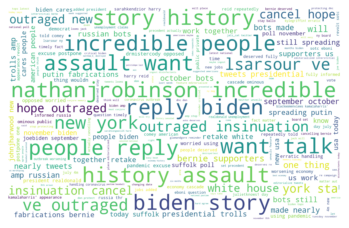

In [19]:
wordcloud1 = WordCloud(
                    background_color= "white",
                    width=1500,
                    height=960,
                    margin=10
                    ).generate(trump_text)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

(-0.5, 1499.5, 959.5, -0.5)

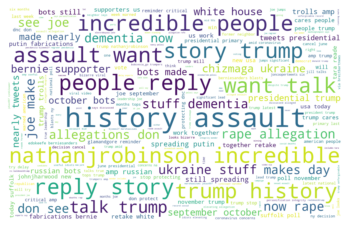

In [20]:
wordcloud2 = WordCloud(
                    background_color= "white",
                    width=1500,
                    height=960,
                    margin=10
                    ).generate(biden_text)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

favorite retweets wordcloud

In [21]:
retweet = pd.read_csv("retweeted_status.csv")
retweet.head(10)

,Unnamed: 0,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,filter_level,lang,possibly_sensitive,display_text_range,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,0,Tue Apr 28 02:11:06 +0000 2020,1254956273386131456,1254956273386131456,Living in Star Wars must have been a trip. The...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Mon Apr 27 23:59:29 +0000 2020,1254923152834080771,1254923152834080771,"Between Election Day and July, 2018, 3.4M new ...","<a href=""http://twitter.com/download/iphone"" r...",True,NaN,NaN,NaN,...,low,en,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tue Apr 28 03:47:36 +0000 2020,1254980560860205056,1254980560860205056,CRUCIAL HOUSE SEATS TO FOLLOW!\n\n- CA25 @Chri...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tue Apr 28 03:54:43 +0000 2020,1254982350489874432,1254982350489874432,2016 election season felt like a Flashpoint pe...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,low,en,False,"[0, 92]",1.254841e+18,1.254841e+18,{'created_at': 'Mon Apr 27 18:34:08 +0000 2020...,"{'url': 'https://t.co/GCz9MNGcJI', 'expanded':...",NaN,NaN
4,4,Mon Apr 27 19:59:50 +0000 2020,1254862841498071040,1254862841498071040,My public service announcement for today:\n\n1...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",True,NaN,NaN,NaN,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Mon Apr 27 21:45:04 +0000 2020,1254889324467945474,1254889324467945474,Of course he ignored them. They were briefing ...,"<a href=""https://about.twitter.com/products/tw...",False,NaN,NaN,NaN,...,low,en,False,"[0, 75]",NaN,NaN,NaN,NaN,"{'media': [{'id': 1254889257644277760, 'id_str...",NaN
6,6,Tue Apr 28 02:48:13 +0000 2020,1254965616164864002,1254965616164864002,"Again, @GaSecofState is proving he's intereste...","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,...,low,en,False,"[0, 140]",1.254889e+18,1.254889e+18,{'created_at': 'Mon Apr 27 21:45:40 +0000 2020...,"{'url': 'https://t.co/ljKPM7C9k2', 'expanded':...",NaN,NaN
7,7,Tue Apr 28 03:47:36 +0000 2020,1254980560860205056,1254980560860205056,CRUCIAL HOUSE SEATS TO FOLLOW!\n\n- CA25 @Chri...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Tue Apr 28 00:49:15 +0000 2020,1254935676631617538,1254935676631617538,New York State @NYGovCuomo was so quick to can...,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,NaN,NaN,...,low,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Tue Apr 28 00:25:03 +0000 2020,1254929585004822529,1254929585004822529,Today we are recognizing Dr. F. Dean Toste of ...,"<a href=""https://www.hootsuite.com"" rel=""nofol...",True,NaN,NaN,NaN,...,low,en,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
a = retweet.sort_values(by = 'favorite_count',ascending=False)
a.iloc[1]["favorite_count"]

183023

In [23]:
b = a.drop_duplicates(['id']) 
favorite_df = b.loc[:, ['id','text','favorite_count']] 
favorite_df.head(20)

,id,text,favorite_count
8852,1242905328209080331,The LameStream Media is the dominant force in ...,227817
2209,1251558135413833728,I don't understand why staying home is so hard...,183023
7669,1192516480849629187,BREAKING: We’ve secured a court order forcing ...,180613
9369,1251589681428520960,China wants Sleepy Joe sooo badly. They want a...,121498
8605,1252542407285055489,Watched the first 5 minutes of poorly rated Mo...,118072
10243,1253848489563283457,It is my heartfelt goal to bring my 99 years o...,107687
6729,1250432951143108609,I’m a Georgia State Representative and lifelon...,102233
9422,1253144625151381504,"Unlike our current president, I will always ch...",86225
9508,1251561332790439938,"....them happy, or even a little bit satisfied...",84906
191,1251339882435211264,Facts:\n\nCalifornia’s Motor Voter law resulte...,47977


In [24]:
with open('favorite.txt','w') as f: 
    for i in range(0,100):
        a1 = favorite_df.iloc[i]['text']
        a2 = remove_urls(a1).lower()
        a3 = re.sub(r'election',' ', a2)
        f.write(a3)
        f.write('\n')
f.close()

(-0.5, 1499.5, 959.5, -0.5)

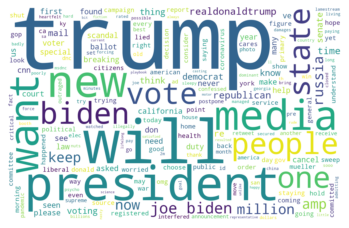

In [25]:
with open('favorite.txt','r') as f2:
 mytext = f2.read()

wordcloud = WordCloud(
                    background_color= "white",
                    width=1500,
                    height=960,
                    margin=10
                    ).generate(mytext)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")